In [2]:
import os, glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split #splits data for training and testing 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback,EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import  classification_report

In [3]:
file_path = '/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group'

In [4]:
name_class = os.listdir(file_path)
name_class

['AB-', 'O+', 'B-', 'B+', 'A-', 'A+', 'O-', 'AB+']

In [6]:
filepaths = list(glob.glob(file_path+'/**/*.*'))

In [7]:
filepaths[-6:-1]

['/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/AB+/cluster_4_1030.BMP',
 '/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/AB+/cluster_4_2965.BMP',
 '/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/AB+/cluster_4_1480.BMP',
 '/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/AB+/cluster_4_4537.BMP',
 '/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/AB+/cluster_4_4220.BMP']

In [8]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
labels

['AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',
 'AB-',


In [9]:

filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
data = pd.concat([filepath, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head(5)


,Filepath,Label
0,/kaggle/input/finger-print-based-blood-group-d...,B+
1,/kaggle/input/finger-print-based-blood-group-d...,AB+
2,/kaggle/input/finger-print-based-blood-group-d...,B-
3,/kaggle/input/finger-print-based-blood-group-d...,O-
4,/kaggle/input/finger-print-based-blood-group-d...,B-


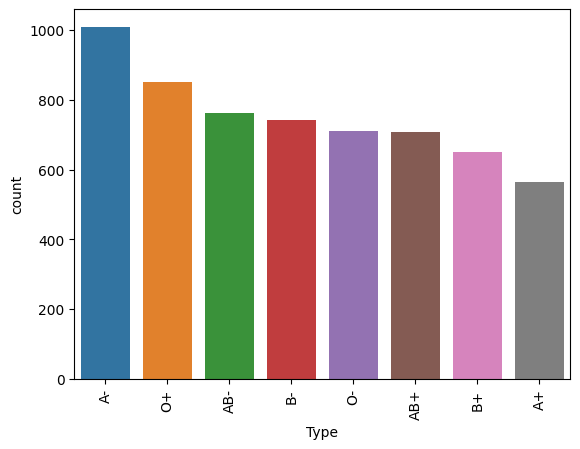

In [10]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90);

In [11]:
train, test = train_test_split(data, test_size=0.20, random_state=42)

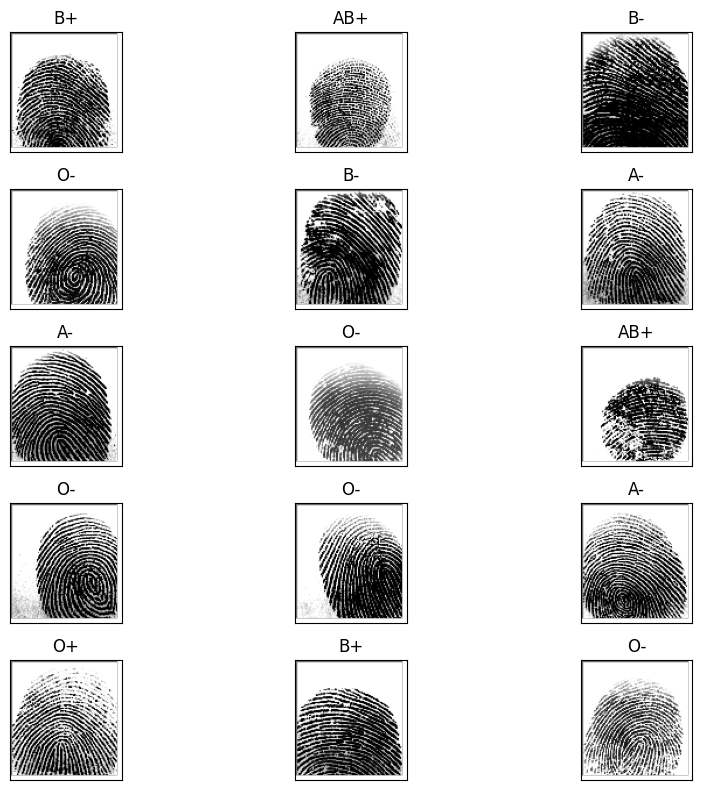

In [12]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10,8), subplot_kw={'xticks':[],'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])
plt.tight_layout()
plt.show()

In [13]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [14]:
import cv2
import numpy as np

# File path of the image using a raw string
image_path = "/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/A-/cluster_1_0.BMP"
# Load the image
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is None:
    print("Error: Could not read the image.")
else:
    # Define the transformation parameters
    angle = 30
    scale = 1.5
    center = (image.shape[1] // 2, image.shape[0] // 2)

    # Get the affine transformation matrix
    matrix = cv2.getRotationMatrix2D(center, angle, scale)

    # Print the affine matrix
    print("Affine Matrix:")
    print(matrix)


Affine Matrix:
[[  1.29903811   0.75       -52.60382907]
 [ -0.75         1.29903811  20.74905661]]


In [15]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(256,256),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)
valid_gen = train_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(256,256),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)
test_gen = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(256,256),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 4800 validated image filenames belonging to 8 classes.
Found 1200 validated image filenames belonging to 8 classes.
Found 1200 validated image filenames belonging to 8 classes.


In [16]:
pretrained_model = ResNet50(
    input_shape=(256,256, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

94765736/94765736 [==============================] - 2s 0us/step


In [17]:
# inputs = pretrained_model.input

# x = Dense(128, activation='relu')(pretrained_model.output)
# x = Dense(128, activation='relu')(x)
# print(inputs.shape)

# outputs = Dense(8, activation='softmax')(x)
# print(outputs.shape)

# model = Model(inputs=inputs, outputs=outputs)
# model.summary()

In [18]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense

# Assuming `pretrained_model` is defined somewhere in your code

# Define the additional layers on top of the pretrained model
inputs = pretrained_model.input
x = Dense(128, activation='relu')(pretrained_model.output)
x = Dense(128, activation='relu')(x)
outputs = Dense(8, activation='softmax')(x)

# Create the final model
model = Model(inputs=inputs, outputs=outputs)

# Display the summary of the model architecture
# model.summary()

# # Access and print limited samples of the weights for each layer
# num_samples = 5  # Number of samples to display
# # for layer in model.layers:
# #     if hasattr(layer, 'weights'):
# #         print(layer.name)
# #         for weight in layer.weights:
#             print(weight.shape)
#             print(weight.numpy()[:num_samples])  # Prints a limited number of samples from the weight matrix


In [19]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [20]:
my_callbacks  = [EarlyStopping(monitor='val_accuracy',
                              min_delta=0,
                              patience=2,
                              mode='auto')]

In [21]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [ ]:
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=50
)

In [ ]:
model.save("best_original_cnn.h5")

In [ ]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [25]:
from keras.models import load_model
model_path = '/kaggle/input/blood-500/model_blood_group_detection.h5'
model = load_model(model_path)
results = model.evaluate(test_gen, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.22904
Test Accuracy: 96.17%


In [38]:
# Predict the label of the test_gen
pred = model.predict(test_gen)
pred = np.argmax(pred,axis=1)
print(pred)

# Map the label
labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

38/38 [==============================] - 153s 4s/step
[6 5 0 ... 2 4 2]


In [39]:
y_test = list(test.Label)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

          A+       0.96      0.99      0.98       110
          A-       0.97      0.93      0.95       201
         AB+       0.96      0.96      0.96       136
         AB-       0.98      0.94      0.96       161
          B+       0.96      0.98      0.97       137
          B-       0.97      0.99      0.98       167
          O+       0.97      0.96      0.96       160
          O-       0.91      0.96      0.94       128

    accuracy                           0.96      1200
   macro avg       0.96      0.96      0.96      1200
weighted avg       0.96      0.96      0.96      1200



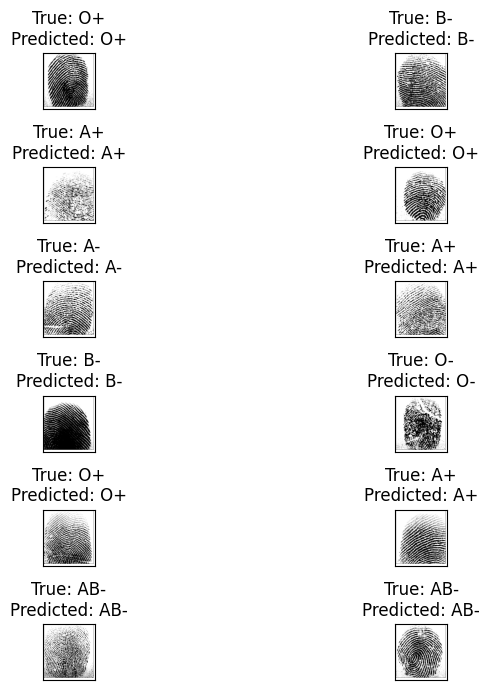

In [44]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(10, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

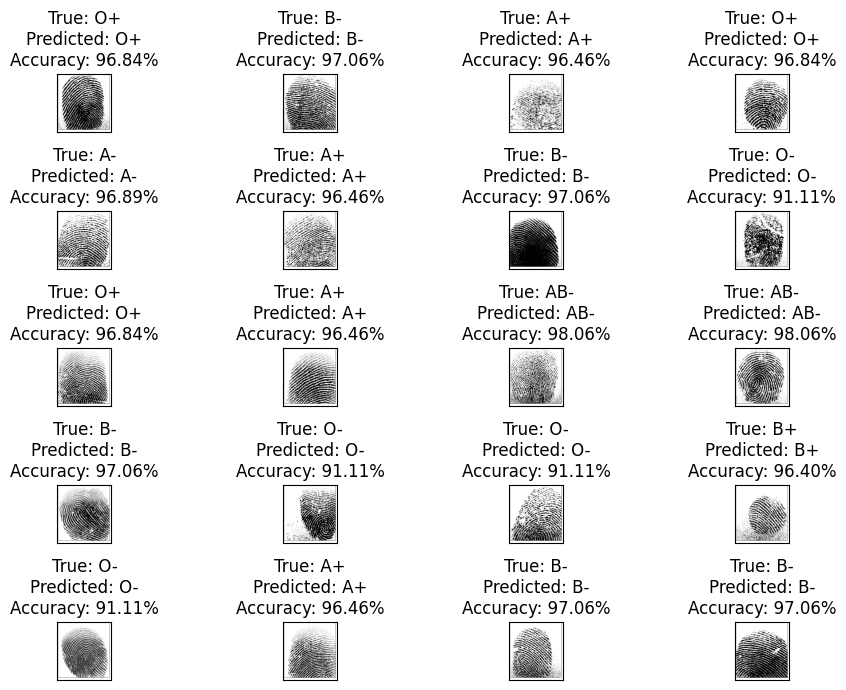

In [84]:
from sklearn.metrics import precision_score

# Assuming you have test_labels_int and pred_int defined
# Convert string labels in test.Label to integers
label_to_int = {label: i for i, label in enumerate(set(test.Label))}
test_labels_int = [label_to_int[label] for label in test.Label]

# Calculate precision score for each class
precision_per_class = precision_score(test_labels_int, pred_int, average=None)

# Plot images with true and predicted labels along with precision percentage
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(10, 7),
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    true_label = test.Label.iloc[i]
    predicted_label = label_to_int[pred[i]]  # Convert predicted label to integer index
    precision_label = precision_per_class[predicted_label] * 100 if predicted_label < len(precision_per_class) else 0
    ax.set_title(f"True: {true_label}\nPredicted: {pred[i]}\nAccuracy: {precision_label:.2f}%")

plt.tight_layout()
plt.show()


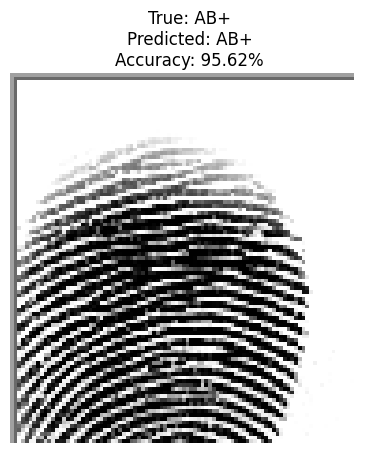

In [79]:
from sklearn.metrics import precision_score

# Assuming you have test_labels_int and pred_int defined
# Convert string labels in test.Label to integers
label_to_int = {label: i for i, label in enumerate(set(test.Label))}
test_labels_int = [label_to_int[label] for label in test.Label]

# Calculate precision score for each class
precision_per_class = precision_score(test_labels_int, pred_int, average=None)

# Choose the index of the image you want to display
image_index = 1199

# Plot the single image with true and predicted labels along with precision percentage
fig, ax = plt.subplots(figsize=(5, 5))

ax.imshow(plt.imread(test.Filepath.iloc[image_index]))
true_label = test.Label.iloc[image_index]
predicted_label = label_to_int[pred[image_index]]  # Convert predicted label to integer index
precision_label = precision_per_class[predicted_label] * 100 if predicted_label < len(precision_per_class) else 0
ax.set_title(f"True: {true_label}\nPredicted: {pred[image_index]}\nAccuracy: {precision_label:.2f}%")

plt.axis('off')
plt.show()


Precision for class 0: 96.46%
Precision for class 1: 96.89%
Precision for class 2: 96.84%
Precision for class 3: 96.40%
Precision for class 4: 97.06%
Precision for class 5: 91.11%
Precision for class 6: 98.06%
Precision for class 7: 95.62%


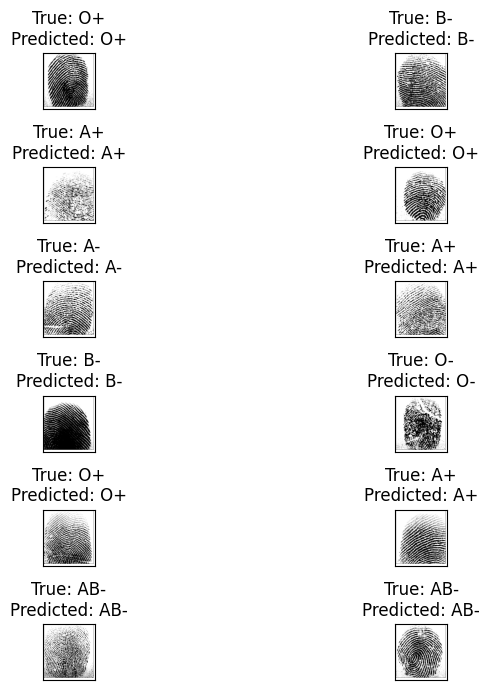

In [59]:
from sklearn.metrics import precision_score

# Assuming you have test_labels_int and pred_int defined
# Convert string labels in test.Label to integers
label_to_int = {label: i for i, label in enumerate(set(test.Label))}
test_labels_int = [label_to_int[label] for label in test.Label]

# Calculate precision score for each class
precision_per_class = precision_score(test_labels_int, pred_int, average=None)

# Plot images with true and predicted labels
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(10, 7),
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {pred[i]}")

# Print precision percentage for each class
for i, precision in enumerate(precision_per_class):
    print(f"Precision for class {i}: {precision * 100:.2f}%")

plt.tight_layout()
plt.show()


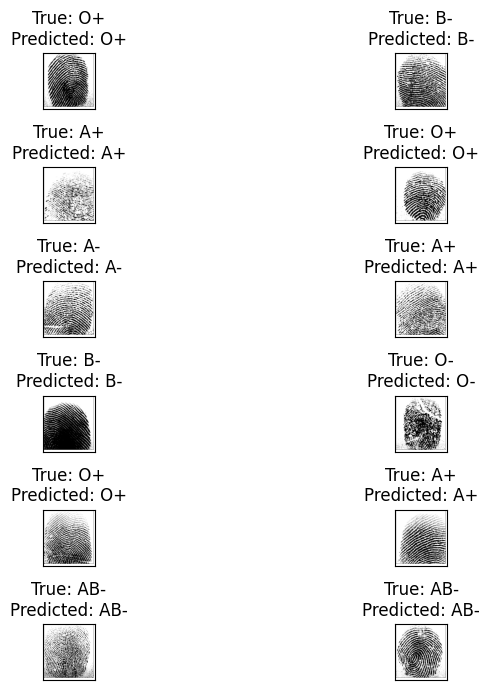

Precision for class 0: 96.46%
Precision for class 1: 96.89%
Precision for class 2: 96.84%
Precision for class 3: 96.40%
Precision for class 4: 97.06%
Precision for class 5: 91.11%
Precision for class 6: 98.06%
Precision for class 7: 95.62%


In [58]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score

# Assuming you have test_labels_int and pred_int already defined

# Plot images with true and predicted labels
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(10, 7),
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {pred[i]}")

plt.tight_layout()
plt.show()

# Calculate precision score for each class
precision_per_class = precision_score(test_labels_int, pred_int, average=None)

# Print precision percentage for each class
for i, precision in enumerate(precision_per_class):
    print(f"Precision for class {i}: {precision * 100:.2f}%")


In [57]:
from sklearn.metrics import precision_score

# Calculate precision score for each class
precision_per_class = precision_score(test_labels_int, pred_int, average=None)

# Print precision percentage for each class
for i, precision in enumerate(precision_per_class):
    print(f"Precision for class {i}: {precision * 100:.2f}%")


Precision for class 0: 96.46%
Precision for class 1: 96.89%
Precision for class 2: 96.84%
Precision for class 3: 96.40%
Precision for class 4: 97.06%
Precision for class 5: 91.11%
Precision for class 6: 98.06%
Precision for class 7: 95.62%


In [54]:
from sklearn.metrics import precision_score

# Convert string labels in test.Label to integers
label_to_int = {label: i for i, label in enumerate(set(test.Label))}
test_labels_int = [label_to_int[label] for label in test.Label]

# Get precision score for each class
precision_per_class =precision_score(test_labels_int, pred,average=None) * 100

# Plot images with true and predicted labels
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 8),
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    true_label = test.Label.iloc[i]
    predicted_label = pred_int[i]
    precision_label = precision_per_class[predicted_label] if predicted_label < len(precision_per_class) else 0
    ax.set_title(f"True: {true_label}\nPredicted: {predicted_label}\nPrecision: {precision_label:.2f}%")

plt.tight_layout()
plt.show()

# Print precision percentage for each class
for i, precision in enumerate(precision_per_class):
    print(f"Precision for class {i}: {precision:.2f}%")


ValueError: Mix of label input types (string and number)

In [46]:
from sklearn.metrics import precision_score

# Convert string labels in test.Label to integers
label_to_int = {label: i for i, label in enumerate(set(test.Label))}
test_labels_int = [label_to_int[label] for label in test.Label]

# Get precision score for each class
precision_per_class = precision_score(test_labels_int, pred_int, average=None) * 100

# Plot images with true and predicted labels
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 8),
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    true_label = test.Label.iloc[i]
    predicted_label = pred_int[i]
    precision_label = precision_per_class[predicted_label] if predicted_label < len(precision_per_class) else 0
    ax.set_title(f"True: {true_label}\nPredicted: {predicted_label}\nPrecision: {precision_label:.2f}%")

plt.tight_layout()
plt.show()

# Print precision percentage for each class
for i, precision in enumerate(precision_per_class):
    print(f"Precision for class {i}: {precision:.2f}%")


ValueError: Found input variables with inconsistent numbers of samples: [1200, 3]

**FOR SINGLE IMAGE EVALUATION**

In [49]:
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
#from sklearn.svm import SVC 

# Assuming you have obtained predictions somehow, let's say in a list called 'pred_int'
# Example:
# pred_int = [0, 1, 0, 1, 0, ...]

# Replace this example with your actual predictions

# Let's assume you have your 'test' dataframe already defined and containing test data

# Convert string labels in test.Label to integers
label_to_int = {label: i for i, label in enumerate(set(test.Label))}
test_labels_int = [label_to_int[label] for label in test.Label]

# Assuming you have already defined 'pred_int' containing predicted labels

# Get precision score for each class
#classifier = SVC() 
#pred_int = classifier.predict(test_gen)
precision_per_class = precision_score(test_labels_int, pred_int, average=None) * 100

# Plot images with true and predicted labels
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 8),
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    true_label = test.Label.iloc[i]
    predicted_label = pred_int[i]  # assuming 'pred_int' contains predicted labels
    precision_label = precision_per_class[predicted_label] if predicted_label < len(precision_per_class) else 0
    ax.set_title(f"True: {true_label}\nPredicted: {predicted_label}\nPrecision: {precision_label:.2f}%")

plt.tight_layout()
plt.show()

# Print precision percentage for each class
for i, precision in enumerate(precision_per_class):
    print(f"Precision for class {i}: {precision:.2f}%")


ValueError: Found input variables with inconsistent numbers of samples: [1200, 3]

In [ ]:
# # Predict the label of the test_gen
# #train_gen=train_gen[:38]
# pred = model.predict(train_gen)
# pred = np.argmax(pred,axis=1)

# # Map the label
# labels = (train_gen.class_indices)
# labels = dict((v,k) for k,v in labels.items())
# pred = [labels[k] for k in pred]

In [ ]:
# y_valid = list(train.Label)
# print(classification_report(y_valid, pred))

In [ ]:
# fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 8),
#                         subplot_kw={'xticks': [], 'yticks': []})

# for i, ax in enumerate(axes.flat):
#     ax.imshow(plt.imread(val.Filepath.iloc[i]))
#     ax.set_title(f"True: {val.Label.iloc[i]}\nPredicted: {pred[i]}")
# plt.tight_layout()
# plt.show()

In [ ]:
from keras.preprocessing import image
import numpy as np
from keras.models import load_model

# Load the pre-trained model
model_path = '/kaggle/input/blood-500/model_blood_group_detection.h5'
model = load_model(model_path)

# Path to the single image you want to predict
image_path = '/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/AB+/cluster_4_1141.BMP'

# Load the image
img = image.load_img(image_path, target_size=(256, 256))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.

# Make the prediction
pred = model.predict(img_array)

# Map the predicted class index to the label
labels = dict((v,k) for k,v in train_gen.class_indices.items())
predicted_class = labels[np.argmax(pred)]

# Print the predicted class
print(f"Predicted class: {predicted_class}")

In [ ]:
import matplotlib.pyplot as plt

# Assuming pred is a list of predicted labels

# Choose an index for the image you want to display
index = 0

plt.imshow(plt.imread(test.Filepath.iloc[index]))
plt.title(f"True: {test.Label.iloc[index]}\nPredicted: {pred[index]}")
plt.axis('off')
plt.show()


In [ ]:
from keras.preprocessing import image
import numpy as np

# Load the image
model_path = '/kaggle/input/blood-500/model_blood_group_detection.h5'
model = load_model(model_path)
img_path = '/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/O-/cluster_7_1002.BMP'
target_size = (224, 224)  # Specify the target size as used in training/testing data preprocessing
img = image.load_img(img_path, target_size=target_size)
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)  # Add batch dimension

# Preprocess the image (same preprocessing applied during training/testing)
# Add your preprocessing steps here (e.g., normalization, rescaling, etc.)

# Make prediction
prediction = model.predict(img)
predicted_class = np.argmax(prediction)

# Map the predicted class
labels = train_gen.class_indices
labels = dict((v, k) for k, v in labels.items())
predicted_label = labels[predicted_class]

print("Predicted Blood Group:", predicted_label)
plt.show()

In [ ]:
from keras.preprocessing import image
import numpy as np

# Load the model
model_path = '/kaggle/input/blood-500/model_blood_group_detection.h5'
model = load_model(model_path)

# Path to the single image you want to predict
image_path = '/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/A-/cluster_1_0.BMP'

# Load and preprocess the image
img = image.load_img(image_path, target_size=(256, 256))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match batch size

# Predict the image
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)

# Map the predicted class to label
labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

# Print the predicted label
print("Predicted blood group:", pred)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the trained model
model_path = '/kaggle/input/blood-500/model_blood_group_detection.h5'
model = load_model(model_path)

# Path to the single image you want to predict
image_path = '/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/AB+/cluster_4_100.BMP'

# Load and preprocess the image
img = image.load_img(image_path, target_size=(256,256))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Normalize the image data if needed

# Make prediction
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)

# Show the image and prediction
fig, ax = plt.subplots(figsize=(6, 4))
ax.imshow(img)
ax.set_title(f"Predicted: {class_labels[predicted_class]}")
ax.axis('off')
plt.show()


In [ ]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Provide the file path of the image you want to evaluate
image_path = '/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/AB+/cluster_4_100.BMP'  # Replace with the actual file path

# Load the trained model
model_path = '/kaggle/input/blood-500/model_blood_group_detection.h5'
model = load_model(model_path)

# Load and preprocess the image
img = image.load_img(image_path, target_size=(256, 256))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize the pixel values to be between 0 and 1, similar to your training data

# Make predictions
predictions = model.predict(img_array)

# Get the predicted class index
predicted_class_index = np.argmax(predictions[0])

# Map the class index to the corresponding label
# Assuming you have a dictionary 'train_gen.class_indices' mapping class indices to labels
labels = train_gen.class_indices
labels = dict((v, k) for k, v in labels.items())
predicted_label = labels[predicted_class_index]

# Display the original image along with the predicted label
plt.imshow(img)
plt.title(f"Predicted: {predicted_label}")
plt.show()


In [1]:
from keras.models import load_model
model_path = '/kaggle/input/blood-500/model_blood_group_detection.h5'
model = load_model(model_path)
results = model.evaluate(test_gen, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

ModuleNotFoundError: No module named 'keras'